# Cluster Analysis

Cluster analysis is a multivariate statistical technique that groups observations on the basis some of their features or variables they are described by, such that

    1. Examples within a cluster are similar (in this case, we speak of high intraclass similarity).
    2. Examples in different clusters are different (in this case, we speak of low interclass similarity)

Measuring the similatity/dissimilarity we can discover implicit patterns in the data in an unsupervised manner, even when no category label is provided. Cluster analyis help us describe, analyze, and gain insight into the data. On the other hand, much of what we can learn from the data depends solely on our ability to interpret the results. 

This notebook is aimed to provide a discussion about Clustering methods, and we are mainly interested in the following topics:

    1. How to perform cluster analysis
    2. How to find the optimal number of clusters
    3. How to identify appropriate features
    4. What objective measures can be defined to evaluate the quality of the clusters
    5. How to interpret the results

### Math Pre-requisites

In order to study and apply efficiently the K-means clustering method, we need to understand its underlying procedure. In other words, we must understand the mathematical approach behind the technique. We will define two concepts here, the **euclidian distance** and the concept of **centroid**.

______________
#### Euclidean distance

the Euclidean distance between two points $x$ and $y$ in a bidimensional space is the **length of the line** connecting them.

<img src='images/euclidean.png'>

As you can see from the figure, we can draw a triangle in the plane with the coordinate of the points. Consequently, the distance (the length of the blue line) is given by the Pythagoras' theorem. Therefore,

$$d(x,y)^2 = (y_1 - x_1)^2 + (y_2 - x_2)^2$$ 

where $x = (x_1,x_2)$ and $y = (y_1,y_2)$ are the coordinates of the points $x$ and $y$, respectively. The equation can be written in the following way

$$d(x,y) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2}$$ 

analogously, we can also use this result for n-dimensional spaces. In this way, for $x = (x_1, x_2, ... , x_n)$ and $y = (y_1, y_2, ... , y_n)$

$$d(x,y) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2 + ... + (y_n - x_n)^2}$$ 

_____________
#### Centroid

In mathematics and physics, the centroid or geometric center of a plane figure is the **arithmetic mean position** of all the points in the figure. For example, take 3 points, $a = (2, 1)$, $b = (3, 4)$ and $c = (4, 1)$. the centroid, $\alpha$, is given by 

$$\alpha = (\tfrac{2 + 3 + 4}{3},\tfrac{1 + 4 + 1}{3}) = (3, 2)$$

Maybe it will be easier if we visualize the points

<img src='images/centroid.png'>

This is a simple example but we can extend this result to more complex situations and any number of points.

## 1. K-Means Clustering

In this section, we will study the **K-Means Clustering model**. K-Means split the data into K clusters based in the K centroids calculated during the fit procedure. Roughly saying, The K-means algorithm perform the following steps:

   1. Choose the number (K) of clusters
   2. Specify the cluster seeds (Start the centroids position)
   3. Assign each point to a centroid based in its proximity (if the centroid $\alpha$ is the nearest centroid to the point $p$, then assign $p$ to $\alpha$, do this for all points)
   4. Adjust the centroid (recalculate the position of each centroid based in the points assigned to them)
   5. Repeat step 3 and 4.
   6. After achieve a stop criteria, end execution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Example 1

We will start with a simple example. It is provided a dataset with geographical information of six countries. We will performing K-Means clustering in this dataset and interpret the results yielded by the model.

#### Load the data

In [2]:
country_data = pd.read_csv('datasets/Country clusters.csv')
country_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


The entries for the Latitude and Longitude columns correspond to the geographic centers of the countries of the dataset in decimal degrees unit. You can verify these values by entering the geographic centers of each country in a website like [latlong](https://www.latlong.net/).

Below, we plot the latitude and longitude coordinates by adjusting the scale for the x and y axis in order to appropriately represent the coordinates of the geographic centers of each country.

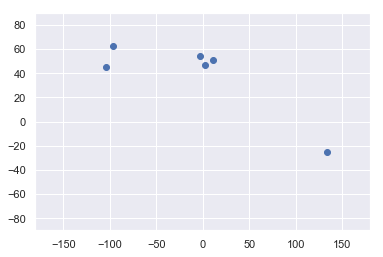

In [3]:
plt.scatter(country_data['Longitude'], country_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Our first Clustering will be performed using only the latitude and longitude as features. So, we need to slice the dataFrame containing the desired features and then apply the fit method to the model.

#### Clustering

In [4]:
# Slicing the data to get the Latitude and Longitude Columns
x = country_data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
# Instantiating a new model with 3 clusters
kmeans = KMeans(3)
clusters = kmeans.fit_predict(x)

In [6]:
data_with_clusters = country_data.copy()

# Assigning the cluster label of each country into the new dataFrame
data_with_clusters['Clusters'] = clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


#### Plotting and Interpreting the results

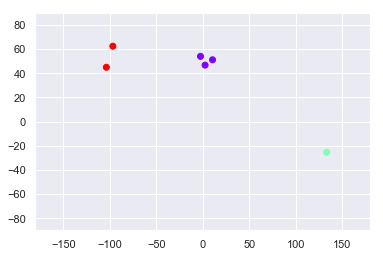

In [7]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

We certainly accomplished a very interesting resulting here. As we defined a model with 3 clusters, the Kmeans model split the data into three clusters.

$C_0 =$ {Canada, USA}, $C_1 =$ {Australia} and $C_2 =$ {France, UK, Germany}.

We can interpret each cluster as a continent. As we only used the coordinates as features, the model assigned each country to its corresponding continent.

In [8]:
data_with_clusters['Continent'] = data_with_clusters['Clusters'].map({0: 'Europe', 1: 'Oceania', 2: 'North America'})
data_with_clusters = data_with_clusters.drop('Clusters', axis=1)
data_with_clusters

,Country,Latitude,Longitude,Language,Continent
0,USA,44.97,-103.77,English,North America
1,Canada,62.40,-96.80,English,North America
2,France,46.75,2.40,French,Europe
3,UK,54.01,-2.53,English,Europe
4,Germany,51.15,10.40,German,Europe
5,Australia,-25.45,133.11,English,Oceania


#### Changing the approach

Also, one could analyze the dataset with respect to the language column. As the language column records are object types, before fit the model we must map the languages names into numbers. So, Let's do it!

In [9]:
data_mapped = country_data.copy()
data_mapped['Language'] = country_data['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [10]:
# Slicing the dataframe, fitting and predicting
feature = data_mapped.iloc[:,3:4]
clusters = kmeans.fit_predict(feature)

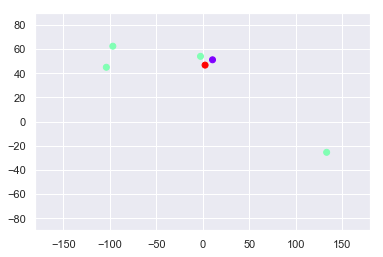

In [11]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

This time our result was very distinct from the first one. Now the clusters do not represent the continent of a set of countries but the language spoken in each of them. This is expected as we used only the language as the only feature of the model.

### Example 2

Let's work in a more complex example. This time, we will perform K-Means in an artifical dataset just for practice purposes. First, we'll create 3 sample distributions:

In [12]:
MAXN = 40

data = np.concatenate([1.25*np.random.randn(MAXN, 2), 
                   5 + 1.5*np.random.randn(MAXN, 2)])
data = np.concatenate([data, [8, 3] + 1.2*np.random.randn(MAXN, 2)])

In [13]:
df = pd.DataFrame(data={'x' : data[:,0], 'y' : data[:,1]})

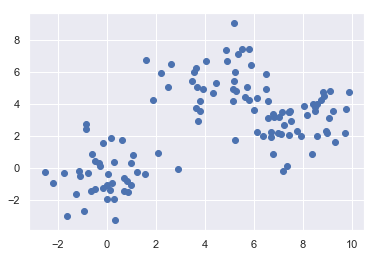

In [14]:
plt.scatter(df['x'], df['y'])
plt.show()

Let us assume that we expect to have three clusters ($k = 3$) and apply the K-means commmand from the Scikit-Learn library. But before that, it is important to note that the algorithm may not ensure convergence to the global minimum. It can be
shown that K-means will always converge to a local minimum of the inertia, which is a topic that will be explored later.

The fact is that K-means performance depends on the random initialization of the seeds, but some seeds
can result in a poor convergence rate, or convergence to suboptimal clustering. To alleviate the problem of local minima, the K-means computation is often performed several times, with different centroid initializations. One way to address
this issue is the k-means++ initialization scheme, which has been implemented in Scikit-learn (use the init=’kmeans++’ parameter). This parameter initializes the centroids to be (generally) far from each other, thereby probably
leading to better results than random initialization.

Time to code!

In [15]:
kmeans = KMeans(init = 'k-means++', n_clusters = 3)
clusters = kmeans.fit_predict(df)

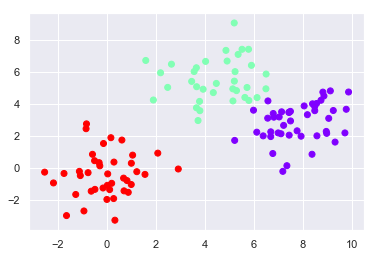

In [16]:
plt.scatter(df['x'],df['y'], c=clusters, cmap='rainbow')
plt.show()

There it is! The result looks great, we can clearly see three different classes in the scatter plot.

In [17]:
df['Clusters'] = clusters
df.head()

,x,y,Clusters
0,0.285578,-1.913343,2
1,0.298263,0.363210,2
2,1.004212,-1.035885,2
3,-0.629813,-1.452334,2
4,0.122613,-1.353907,2


In [18]:
df['class'] = df['Clusters'].map({0:'blue', 1:'green', 2:'red'})
df = df.drop('Clusters', axis=1)
df.head()

,x,y,class
0,0.285578,-1.913343,red
1,0.298263,0.363210,red
2,1.004212,-1.035885,red
3,-0.629813,-1.452334,red
4,0.122613,-1.353907,red
